Imports

In [61]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

Load images

(4272, 2848)


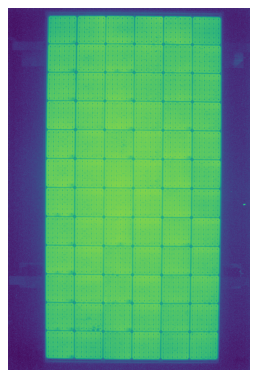

In [62]:
image = cv2.imread("C:/Users/chuck/OneDrive/Desktop/Honors/EL_images/Q72712M1801AJO0421_IMG_8916.JPG", 0)
# image = cv2.imread("C:/Users/chuck/OneDrive/Desktop/Honors/EL_images/Q72712M1802ARK1119_IMG_8918.JPG", 0)

print(image.shape)
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(image)

139


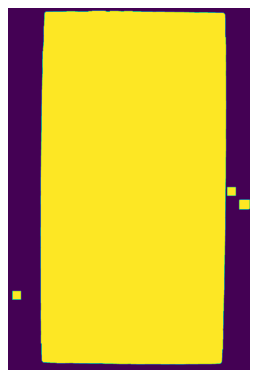

In [63]:
image = cv2.blur(image, (5,5))
avg_intensity = int(cv2.mean(image)[0])
print(avg_intensity)

_, thresh = cv2.threshold(image, int(avg_intensity*0.8), 255, cv2.THRESH_BINARY)

kernel = np.ones((100,100), np.uint8)
dilated = cv2.dilate(thresh, kernel, iterations=1)

plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(dilated)

4


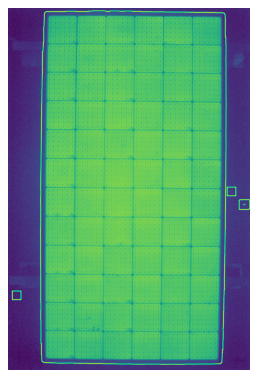

In [64]:
contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
image_cp = np.copy(image)
image_cp = cv2.drawContours(image_cp, contours, -1, (255,255,255), 10)
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(image_cp)


In [65]:
def largest_rectangle(contours):
    # Approximate contours to polygons and find the largest rectangle
    largest_rect = None
    max_area = 0
    for cnt in contours:
        # Approximate the contour to a polygon
        poly = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt,True), True)
        # If the polygon has 4 vertices (is a rectangle)
        if len(poly) == 4:
            # Calculate the area of the polygon
            area = cv2.contourArea(poly)
            # If the area is larger than the current maximum
            if area > max_area:
                # Update the maximum area and largest rectangle
                max_area = area
                largest_rect = poly
    # Return the largest rectangle
    return largest_rect

rect = largest_rectangle(contours)
# Convert the list of points to a numpy array
rect = np.array(rect)

# Reshape the array to a 1D array of (x, y) tuples
points = rect.reshape(-1, 2)
points = np.float32(points)


<class 'numpy.ndarray'>


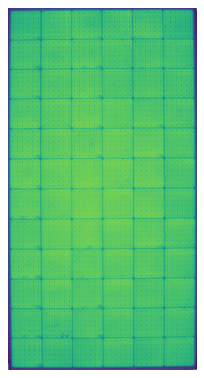

In [66]:
def order_points(points):
    # Compute the sums and differences of the x and y coordinates
    sums = [p[0] + p[1] for p in points]
    diffs = [p[0] - p[1] for p in points]
    # Find the indices of the points with the smallest and largest sums
    topleft_index = np.argmin(sums)
    bottomright_index = np.argmax(sums)
    # Find the indices of the points with the smallest and largest differences
    topright_index = np.argmin(diffs)
    bottomleft_index = np.argmax(diffs)
    return np.float32([points[topleft_index], points[topright_index], points[bottomright_index], points[bottomleft_index]])


def reproject(image, original_pts, destination_pts):
    # Get perspective transform M
    original_pts = order_points(original_pts)
    destination_pts = order_points(destination_pts)
    print(type(destination_pts))
    M = cv2.getPerspectiveTransform(original_pts, destination_pts)
    size = int(dest_pts[3][0]), int(dest_pts[3][1])
    return cv2.warpPerspective(image, M, size)

x, y, w, h = cv2.boundingRect(rect)
dest_pts = np.float32([[0, 0], [w, 0], [0, h], [w, h]])
cropped = reproject(image_cp, points, dest_pts)

plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(cropped)

Find Cell lines

In [67]:
def brighten_away_from_center(img):
    # Calculate the center pixel coordinates
    height, width = img.shape[:2]
    center_x, center_y = width // 2, height // 2
    
    # Create a meshgrid of x and y coordinates
    x, y = np.meshgrid(np.arange(width), np.arange(height))
    
    # Calculate the distance of each pixel from the center pixel
    distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
    
    # Normalize the distance to a range of 0 to 1
    distance_normalized = distance / np.max(distance)
    
    # Brighten the image based on the distance from the center pixel
    brightness_factor = 1 + distance_normalized / 6
    brightened_img = np.clip(img * brightness_factor, 0, 255).astype(np.uint8)
    
    return brightened_img

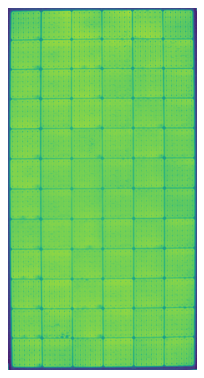

In [68]:
cropped_cp = np.copy(cropped)
cropped_cp = brighten_away_from_center(cropped_cp)

plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(cropped_cp)

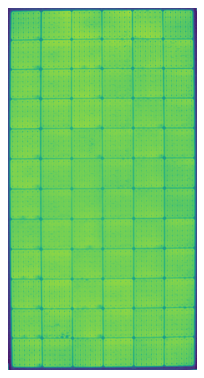

In [69]:
def scale_image(image, scale_factor):
    # Calculate the new dimensions of the image
    new_width = int(image.shape[1] * scale_factor)
    new_height = int(image.shape[0] * scale_factor)

    # Resize the image using the new dimensions
    return cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

scale_factor = 0.2
cropped_cp = scale_image(cropped_cp, scale_factor)

plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(cropped_cp)

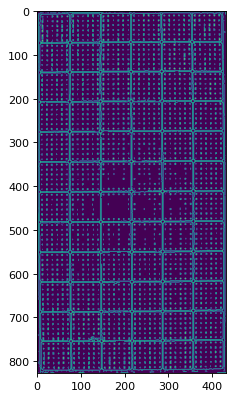

In [70]:
edges = cv2.Canny(cropped_cp, 70, 110)

_, thresh = cv2.threshold(cropped_cp, 195, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(8, 6), dpi=80)

plt.imshow(edges)

pick out horizontal hough lines

92
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
4.371139e-08
100
100
100
100
100
100
4.371139e-08
4.371139e-08
4.371139e-08
100
4.371139e-08
4.371139e-08
4.371139e-08
100
4.371139e-08
100
4.371139e-08
100
100
100
4.371139e-08
28.636292
100
100
28.636292
100
100
4.371139e-08
28.636292
4.371139e-08
100
4.371139e-08
28.636292
-28.636255
100
100
28.636292
-28.636255
28.636292
-28.636255
-28.636255
28.636292
28.636292
28.636292
-28.636255
28.636292
-28.636255
-28.636255
100
9.514361
-28.636255
100
100
28.636292
28.636292
-28.636255
28.636292
28.636292
28.636292
28.636292
100
28.636292


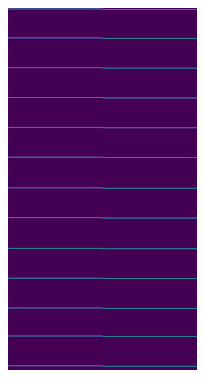

In [71]:
cropped_cp_empty = np.copy(cropped_cp)*0

lines = cv2.HoughLines(edges, 2, np.pi/90, 250)

print(len(lines))

# Loop over the detected lines
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    slope = - a / b if b != 0 else 100 # divide by zero saftey
    print(slope)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    # Check if the line is approximately horizontal

    if abs(slope)<0.05:
        # Draw the line on the original image
        cv2.line(cropped_cp_empty, (x1, y1), (x2, y2), (255, 255, 255), 1)

plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(cropped_cp_empty)

Pick out vertical lines

7


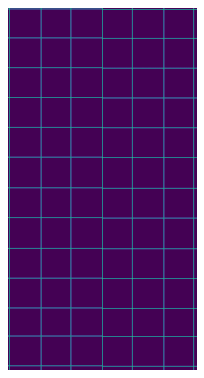

In [72]:
lines = cv2.HoughLines(edges, 2, np.pi/90, 600)

# Loop over the detected lines
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    slope = - a / b if b != 0 else 100 # divide by zero saftey
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    # Check if the line is approximately horizontal
    if abs(slope)>50:
        # Draw the line on the original image
        cv2.line(cropped_cp_empty, (x1, y1), (x2, y2), (255, 255, 255), 1)

plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(cropped_cp_empty)

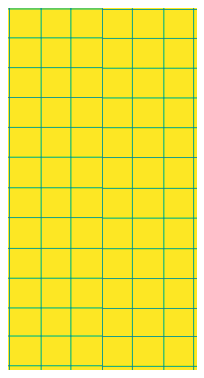

In [73]:
cells = cv2.bitwise_not(cropped_cp_empty)

plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(cells)

Bring image back to original res

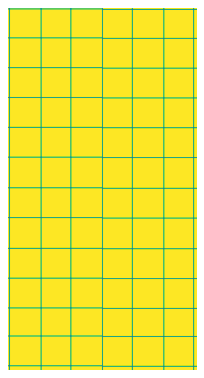

In [74]:
cells = scale_image(cells, 1/scale_factor)
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(cells)

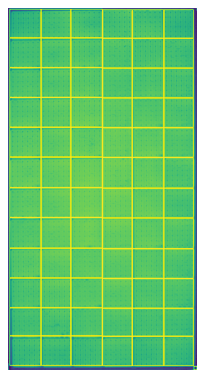

In [75]:
def find_similar_contours(example_shape, contours):
    similar_contours = []

    for contour in contours:
        # Approximate the contour with a polygon
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)

        if len(approx) == 4:
            similarity = cv2.matchShapes(approx, example_shape, cv2.CONTOURS_MATCH_I1, 0)
            if similarity < 0.01:
                similar_contours.append(contour)
    return similar_contours

# function that returns contours with similar means

contours, hierarchy = cv2.findContours(cells, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
panel_shape = np.array([[0,0], [0,1], [1,1], [1,0]])
panel_contours = find_similar_contours(panel_shape, contours)
cropped_cp = np.copy(cropped)
cropped = cv2.drawContours(cropped, panel_contours, -1, (255,255,255), 10)
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(cropped)

In [76]:
panel_images = []

def width_and_height_filter(contours, width, height, tolerance):
    good_contours = []
    for contour in panel_contours:
        _, _, w, h = cv2.boundingRect(contour)
        if w < width*(1-tolerance) or w > width * (1+tolerance):
            continue
        if h < height*(1-tolerance) or w > height * (1+tolerance):
            continue
        good_contours.append(contour)
    return good_contours

panel_contours = width_and_height_filter(panel_contours, 325, 325, 0.2)

In [77]:
def sort_contours(contours):
    centers = []
    for contour in contours:
        M = cv2.moments(contour)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        centers.append((cx, cy))
    
    # Sort the contours by their x-coordinate
    sorted_indices = np.argsort([center[1] for center in centers])
    sorted_contours = [contours[i] for i in sorted_indices]

     # Split the contours into rows
    rows = []
    row_indices = []
    prev_center_y = None
    for i, contour in enumerate(sorted_contours):
        center_x, center_y = centers[sorted_indices[i]]
        if prev_center_y is None or center_y - prev_center_y > 10:
            row_indices.append([i])
            rows.append([contour])
        else:
            row_indices[-1].append(i)
            rows[-1].append(contour)
        prev_center_y = center_y
    
    # Sort the contours within each row by their x-coordinate
    for i, row in enumerate(rows):
        row_sorted_indices = np.argsort([centers[sorted_indices[j]][0] for j in row_indices[i]])
        rows[i] = [row[j] for j in row_sorted_indices]

    return rows

rows = sort_contours(panel_contours)

In [78]:
def label_image(image, text,font=cv2.FONT_HERSHEY_SIMPLEX, font_scale=2, color=(255, 255, 255), thickness=2):
    # Get the dimensions of the image
    height, width = image.shape
    
    # Get the dimensions of the text
    text_width, text_height = cv2.getTextSize(text, font, font_scale, thickness)[0]
    
    # Compute the position of the text
    text_x = int((width - text_width) / 2)
    text_y = int((height + text_height) / 2)
    
    # Put the text on the image
    cv2.putText(image, text, (text_x, text_y), font, font_scale, (0,0,0), thickness+1)
    cv2.putText(image, text, (text_x, text_y), font, font_scale, color, thickness)

20 25 355 325
380 25 335 325
720 25 355 325
1080 30 335 325
1420 30 355 325
1780 30 335 325
20 355 355 335
380 355 335 335
720 355 355 335
1080 360 335 335
1420 360 355 335
1780 360 335 335
20 695 355 335
380 695 335 335
720 695 355 335
1080 700 335 335
1420 700 355 335
1780 700 335 335
20 1035 355 335
380 1035 335 335
720 1035 355 335
1080 1040 335 335
1420 1040 355 335
1780 1040 335 335
20 1375 355 335
380 1375 335 335
720 1375 355 335
1080 1380 335 335
1420 1380 355 335
1780 1380 335 335
20 1715 355 345
380 1715 335 345
720 1715 355 345
1080 1720 335 345
1420 1720 355 345
1780 1720 335 345
20 2065 355 335
380 2065 335 335
720 2065 355 335
1080 2070 335 335
1420 2070 355 335
1780 2070 335 335
20 2405 355 345
380 2405 335 345
720 2405 355 345
1080 2410 335 345
1420 2410 355 345
1780 2410 335 345
20 2755 355 335
380 2755 335 335
720 2755 355 335
1080 2760 335 335
1420 2760 355 335
1780 2760 335 335
20 3095 355 335
380 3095 335 335
720 3095 355 335
1080 3100 335 335
1420 3100 355 335
17

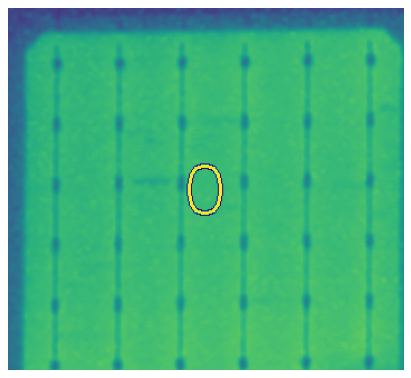

In [79]:
i = 0
panel_image_rows = []
for row in rows:
    panel_image_rows.append([])
    for contour in row:
        x,y,w,h = cv2.boundingRect(contour)
        print(x,y,w,h)
        panel_image = cropped_cp[y:y+h, x:x+w]
        label_image(panel_image, f'{i}')
        panel_images.append(panel_image)
        panel_image_rows[-1].append(panel_image)
        i += 1

plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(panel_images[0])

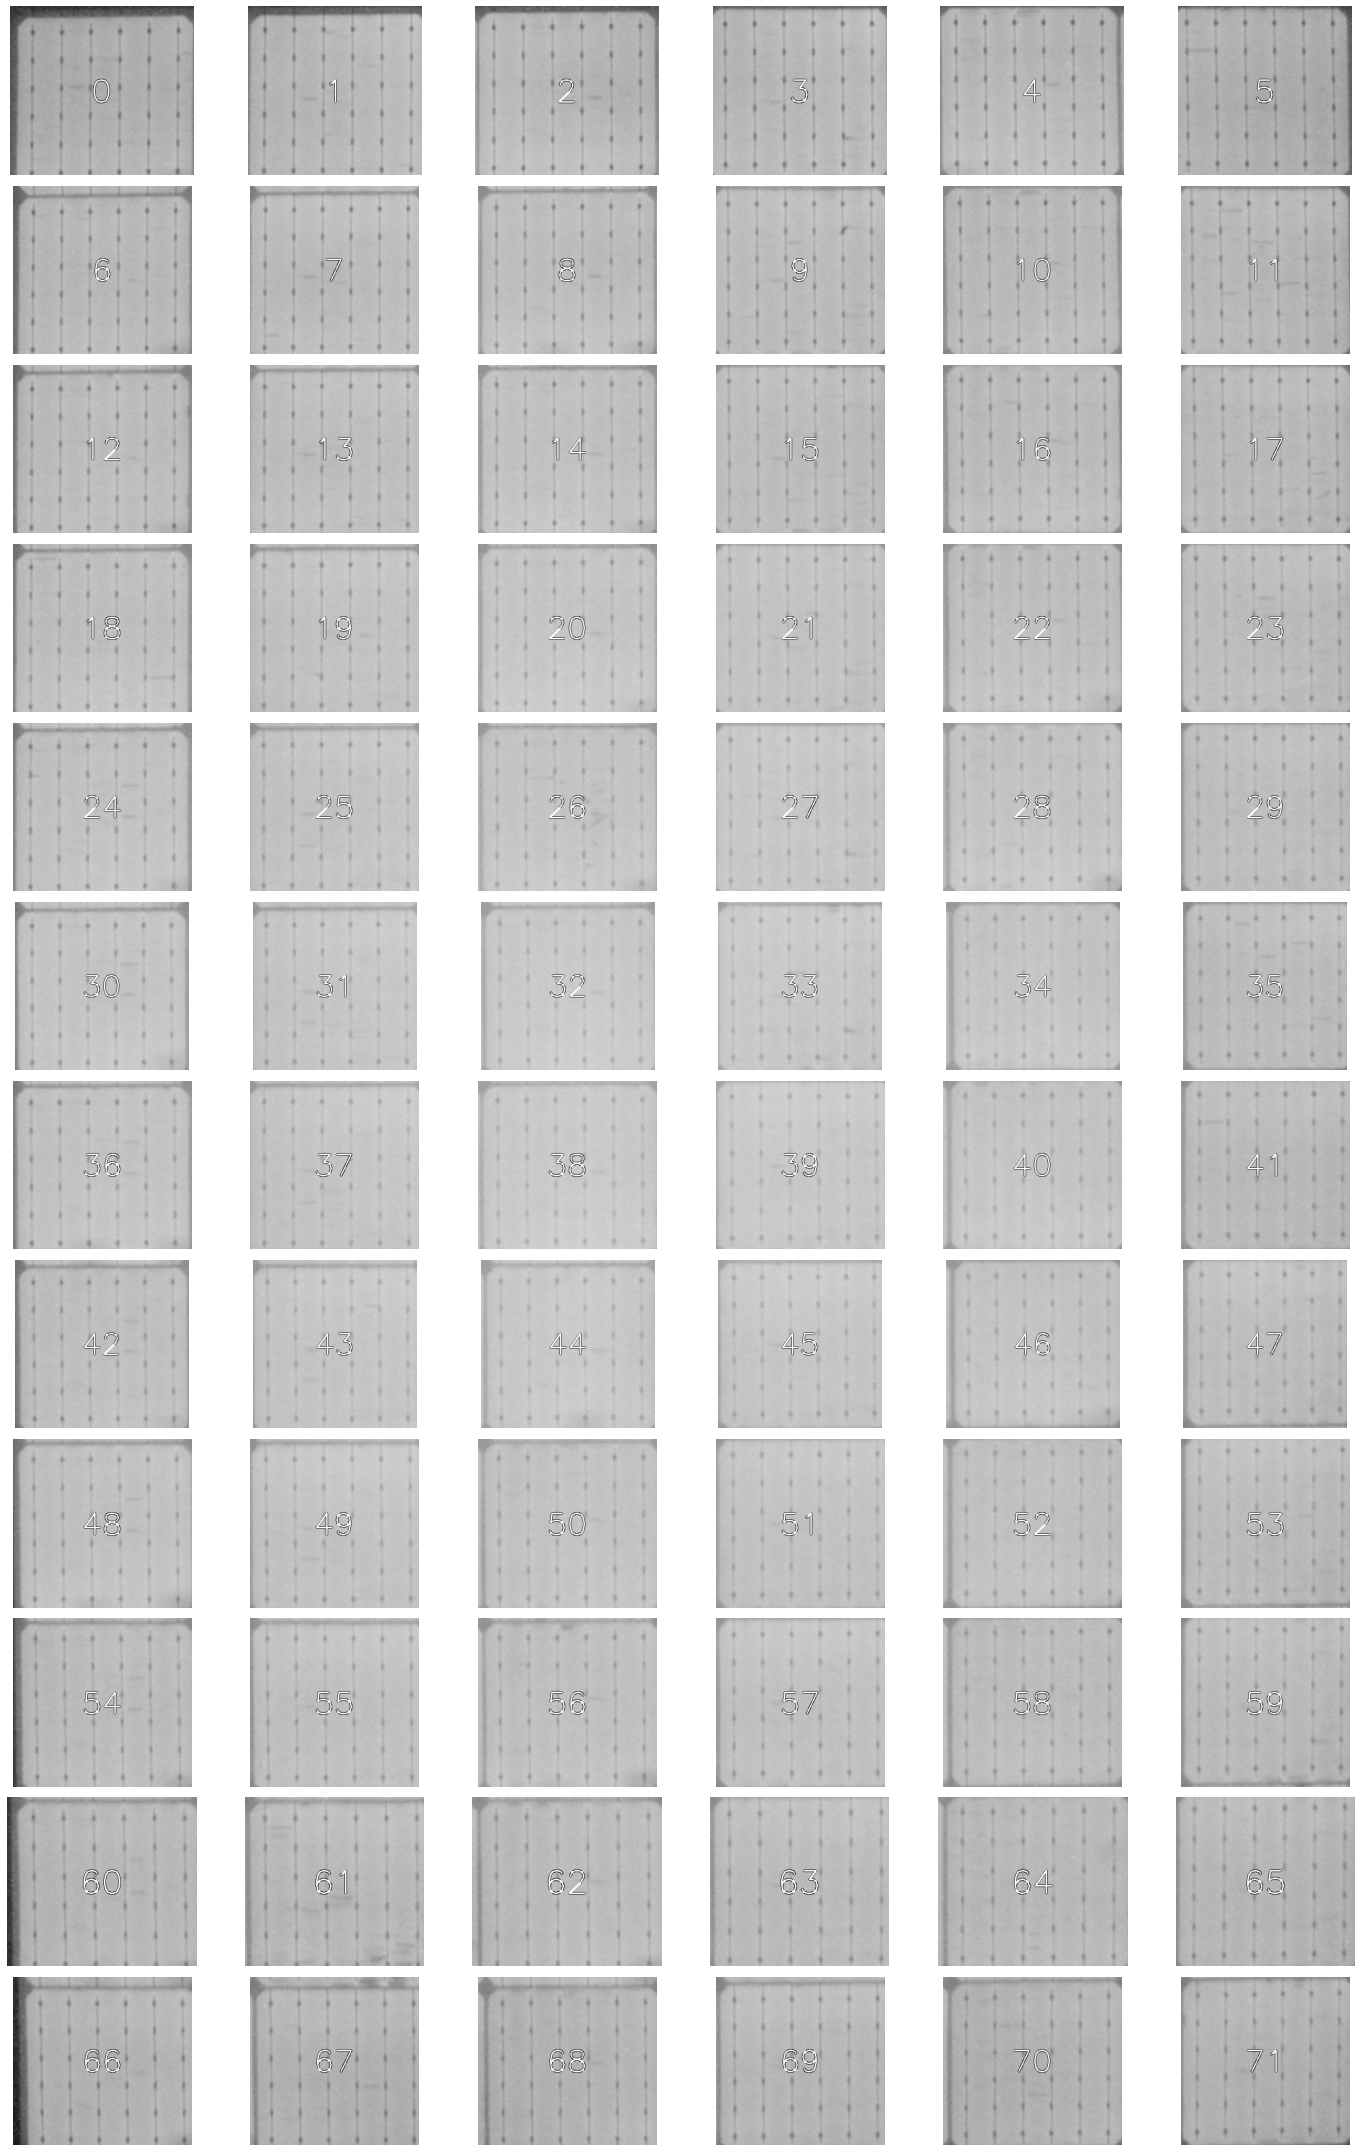

In [80]:
num_rows, num_cols = np.shape(panel_image_rows)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 30))

for row in range(num_rows):
    for col in range(num_cols):
        # Generate a random image for each subplot
        image = panel_image_rows[row][col]
        
        # Display the image in the current subplot
        axs[row, col].imshow(image, cmap='gray')
        axs[row, col].axis('off')
        
# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()